In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

from matplotlib import pyplot as plt

In [2]:
qc = QuantumCircuit(2)
qc.h(0)

In [3]:
qc.cx(0,1)

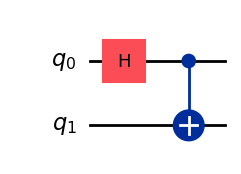

In [4]:
qc.draw("mpl")

In [5]:
observables_labels = ["IZ","IX","ZI","XI","ZZ","XX"]
observables = [SparsePauliOp(label) for label in observables_labels]


In [6]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

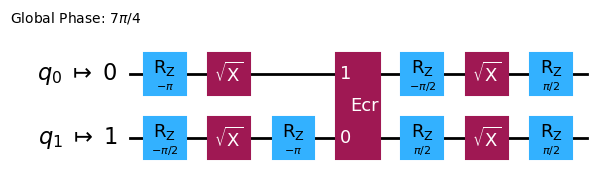

In [7]:

isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [8]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

In [9]:
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

In [10]:
job = estimator.run([(isa_circuit, mapped_observables)])

In [11]:
print(f"<<< Job ID: {job.job_id()}")
#job.job_id() can be used to retrieve the information later.

<<< Job ID: cz4m3x710wx0008bfk3g


In [ ]:
job_result = job.result()
pub_result = job.result()[0]

In [ ]:
pub_result

In [ ]:
values = pub_result.data.evs
errors = pub_result.data.stds

In [ ]:
plt.plot(observables_labels, values, "-0")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [ ]:
def get_qc_for_n_qbit_GHZ_state(n: int) -> QuantumCircuit:
    if isinstance(n,int) and n >=2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n-1):
            qc.cx(i, i+1)
    else:
        raise Exception("n is not a valid input")
    return qc

n = 100
qc = get_qc_for_n_qbit_GHZ_state(n)

In [ ]:
from qiskit.quantum_info import SparsePauliOp
 
# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2 - i) for i in range(n - 1)
]
print(operator_strings)
print(len(operator_strings))
 
operators = [SparsePauliOp(operator) for operator in operator_strings]